In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:/Users/PMLS/OneDrive/Desktop/sales_data_sample.csv"  
df = pd.read_csv(file_path, encoding="latin1")


print(df.head())
print(df.info())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [43]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df = df.assign(STATE=df['STATE'].fillna('Unknown'))
df['POSTALCODE'] = pd.to_numeric(df['POSTALCODE'], errors='coerce').fillna(0).astype(int)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year,Month,postal code
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NY,10022,USA,NaN,Yu,Kwai,Small,2003,2,10022
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Unknown,51100,France,EMEA,Henriot,Paul,Small,2003,5,51100
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,7,75508
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,CA,90003,USA,NaN,Young,Julie,Medium,2003,8,90003
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,CA,0,USA,NaN,Brown,Julie,Medium,2003,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,Unknown,28034,Spain,EMEA,Freyre,Diego,Small,2004,12,28034
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Unknown,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,2005,1,90110
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,Unknown,28034,Spain,EMEA,Freyre,Diego,Medium,2005,3,28034
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,Unknown,31000,France,EMEA,Roulet,Annette,Small,2005,3,31000


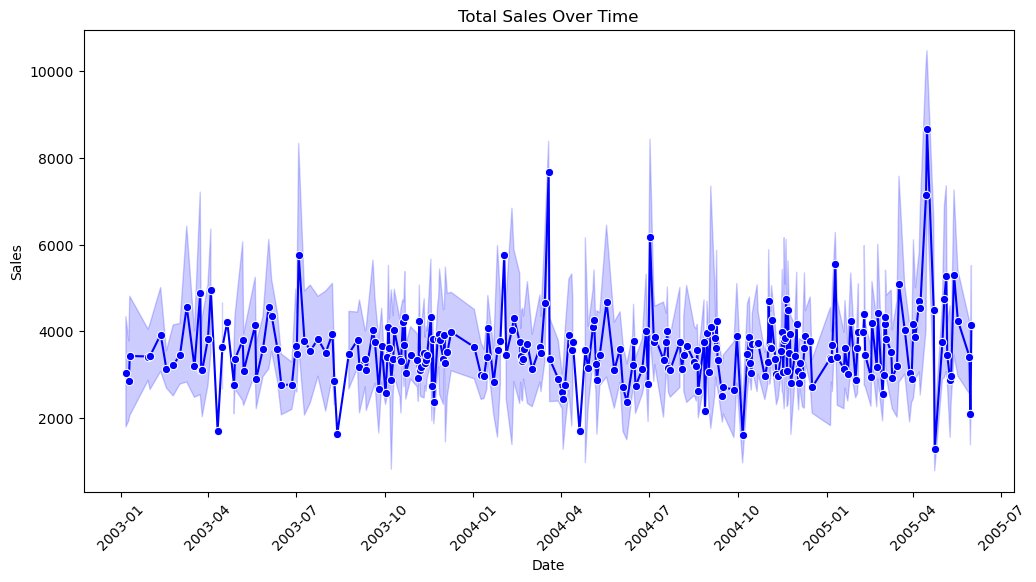

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ORDERDATE', y='SALES', marker="o", color="b")
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_14768\758619000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='PRODUCTLINE', y='SALES', palette="viridis")


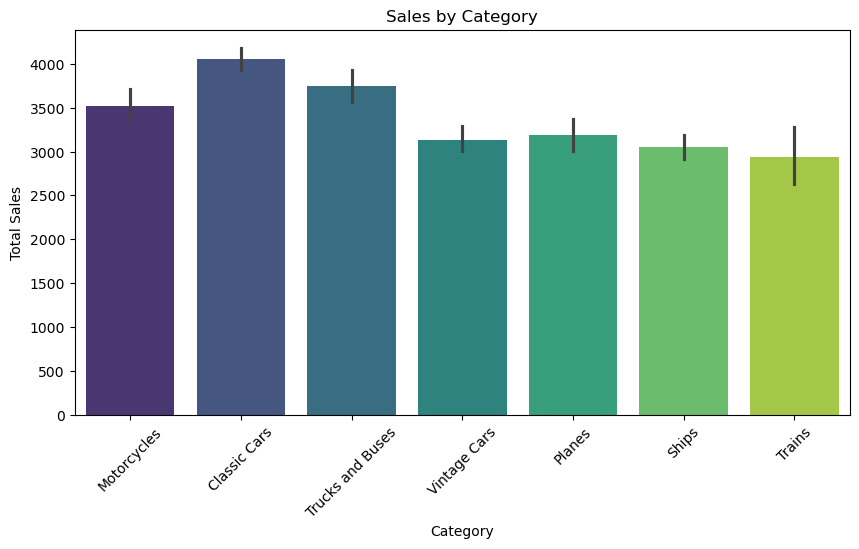

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='PRODUCTLINE', y='SALES', palette="viridis")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

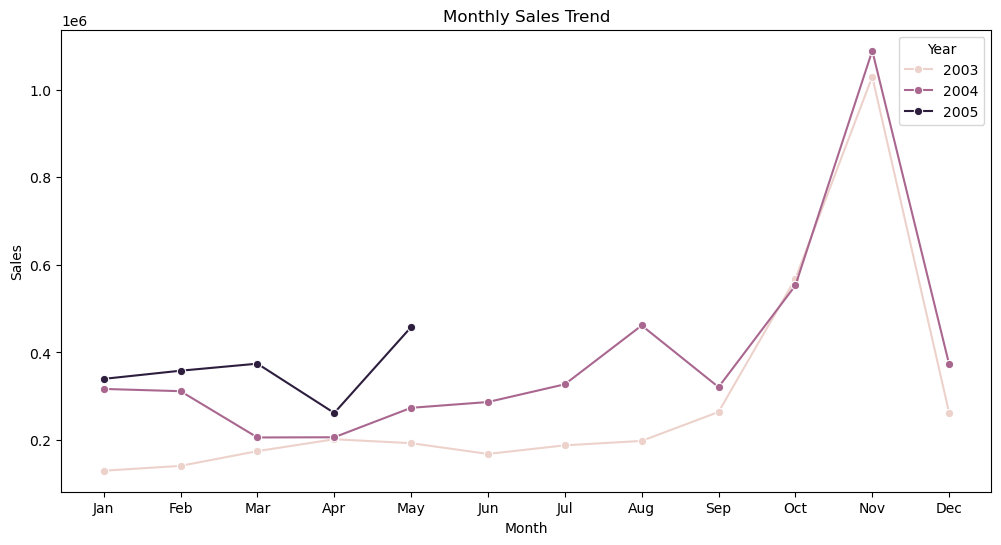

In [49]:
monthly_sales = df.groupby(['Year', 'Month'])['SALES'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='SALES', hue='Year', marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend(title="Year")
plt.show()

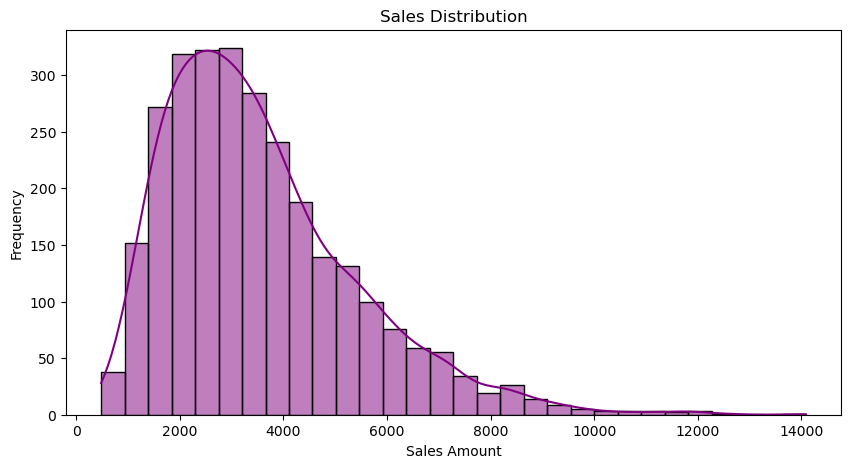

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SALES'], bins=30, kde=True, color='purple')
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

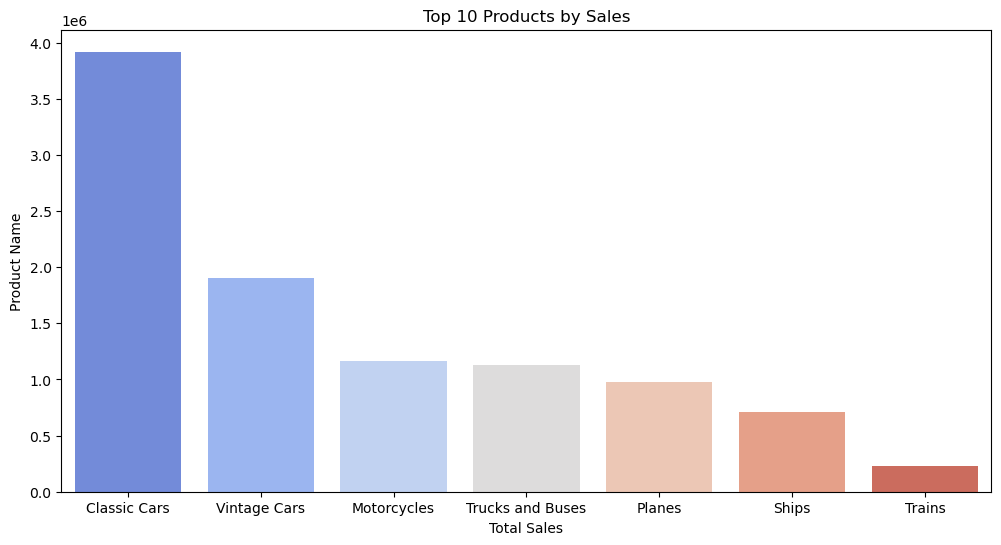

Data visualization complete.


In [71]:
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='PRODUCTLINE', y='SALES', palette="coolwarm",hue="PRODUCTLINE")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

print("Data visualization complete.")